In [23]:
import json 
import numpy as np 
import pandas as pd 

In [24]:
pwd

'/app/timeseries/multiclass_src/notebooks'

# 1. Reading in from eval json

In [26]:
def load_eval_json(eval_file): 
    results_path = "/app/timeseries/multiclass_src/results/searchtau/20201210"
    output_file = eval_file
    fp = "/".join([results_path, output_file])
    with open(fp, "r+") as f: 
        results = json.load(f)
    return results 

In [27]:
e5_stau_res = load_eval_json(eval_file="20201210_e5_agg_results.json")
e10_stau_res = load_eval_json(eval_file="20201210_e10_agg_results.json")

In [28]:
def aggregate_runs(results_json): 
    '''Assuming each input is an array of JSONs that all have the same shape
    This aggregates an array of jsons together into a singular one, based on the set fields below
    '''
    eval_json = {}
    eval_taus = ['0.1', '0.2', '0.3', '0.4', '0.45', '0.5', '0.55', '0.6', '0.7', '0.8', '0.9']
    for tau in eval_taus: 
        eval_json[str(tau)] = {}
        eval_json[str(tau)]['mean_f1'] =  np.mean([x[str(tau)]['mean_f1'] for x in results_json])
        class_f1s = [x[str(tau)]['class_f1s'] for x in results_json]
        eval_json[str(tau)]['class_f1s'] = np.mean(class_f1s, axis=0)
        
        class_pr = [x[str(tau)]['class_precisions'] for x in results_json]
        eval_json[str(tau)]['class_precisions'] = np.mean(class_pr, axis=0)
        eval_json[str(tau)]['mean_pr'] = np.mean(eval_json[str(tau)]['class_precisions'])
        
        class_re = [x[str(tau)]['class_recalls'] for x in results_json]
        eval_json[str(tau)]['class_recalls'] = np.mean(class_re, axis=0)
        eval_json[str(tau)]['mean_re'] = np.mean(eval_json[str(tau)]['class_recalls'])
    return eval_json 

In [29]:
e5_stau_agg = aggregate_runs(e5_stau_res)
e10_stau_agg = aggregate_runs(e10_stau_res)

In [30]:
e5_stau_agg

{'0.1': {'mean_f1': 0.5125630497932434,
  'class_f1s': array([0.5926558 , 0.61690988, 0.35773156, 0.31531555, 0.39841672,
         0.39593209, 0.61185163, 0.60212022, 0.72134332, 0.51335382]),
  'class_precisions': array([0.59639682, 0.55245233, 0.27103785, 0.20504115, 0.30650006,
         0.29817444, 0.64496126, 0.6072811 , 0.77102415, 0.8026555 ]),
  'mean_pr': 0.5055524642268817,
  'class_recalls': array([0.59077152, 0.69877889, 0.57090513, 0.69614842, 0.59222949,
         0.60378669, 0.58497041, 0.60580808, 0.67908788, 0.37852437]),
  'mean_re': 0.6001010864973069},
 '0.2': {'mean_f1': 0.522210935751597,
  'class_f1s': array([0.5997178 , 0.61405675, 0.38434589, 0.39296158, 0.4617504 ,
         0.41889751, 0.6420658 , 0.53161099, 0.68292826, 0.49377444]),
  'class_precisions': array([0.59544859, 0.58094877, 0.32176018, 0.28053233, 0.40503811,
         0.34572695, 0.67966133, 0.57847077, 0.70022082, 0.75635699]),
  'mean_pr': 0.5244164854288101,
  'class_recalls': array([0.60619048, 

In [31]:
e5_f1s = [e5_stau_agg[x]['mean_f1'] for x in e5_stau_agg]
e5_pr = [e5_stau_agg[x]['mean_pr'] for x in e5_stau_agg]
e5_re = [e5_stau_agg[x]['mean_re'] for x in e5_stau_agg]
e10_f1s = [e10_stau_agg[x]['mean_f1'] for x in e10_stau_agg]
e10_pr = [e10_stau_agg[x]['mean_pr'] for x in e10_stau_agg]
e10_ce = [e10_stau_agg[x]['mean_re'] for x in e10_stau_agg]

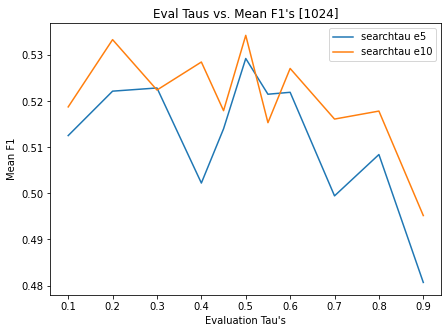

In [32]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (7,5)
# plot the mean f1's across the taus 
taus = [0.1, 0.2, 0.3, 0.4, 0.45, 0.5, 0.55, 0.6, 0.7, 0.8, 0.9]
plt.plot(taus, e5_f1s, label="searchtau e5")
plt.plot(taus, e10_f1s, label="searchtau e10")
plt.title("Eval Taus vs. Mean F1's [1024]")
plt.xlabel("Evaluation Tau's")
plt.ylabel("Mean F1")
plt.legend()
plt.show()

# Pulling in A-F1 and CE

In [33]:
def load_eval_json(eval_file): 
    results_path = "/app/timeseries/multiclass_src/results/new_runs"
    output_file = eval_file
    fp = "/".join([results_path, output_file])
    with open(fp, "r+") as f: 
        results = json.load(f)
    return results 

In [35]:
af1_results = load_eval_json(eval_file="20201211_approxf1_eval.json")
ce_results = load_eval_json(eval_file="20201211_ce_eval.json")

In [36]:
af1_agg = aggregate_runs(af1_results)
ce_agg = aggregate_runs(ce_results)

In [37]:
af1_f1s = [af1_agg[x]['mean_f1'] for x in af1_agg]
af1_pr = [af1_agg[x]['mean_pr'] for x in af1_agg]
af1_re = [af1_agg[x]['mean_re'] for x in af1_agg]
ce_f1s = [ce_agg[x]['mean_f1'] for x in ce_agg]
ce_pr = [ce_agg[x]['mean_pr'] for x in ce_agg]
ce_re = [ce_agg[x]['mean_re'] for x in ce_agg]

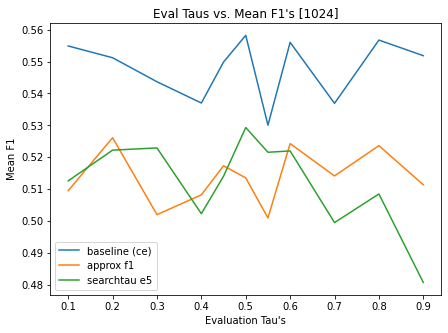

In [38]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (7,5)
# plot the mean f1's across the taus 
taus = [0.1, 0.2, 0.3, 0.4, 0.45, 0.5, 0.55, 0.6, 0.7, 0.8, 0.9]
plt.plot(taus, ce_f1s, label="baseline (ce)")
plt.plot(taus, af1_f1s, label="approx f1")
plt.plot(taus, e5_f1s, label="searchtau e5")
plt.title("Eval Taus vs. Mean F1's [1024]")
plt.xlabel("Evaluation Tau's")
plt.ylabel("Mean F1")
plt.legend()
plt.show()